In [54]:
import numpy as np
import seaborn as sns
from cwgp.cwgp import CWGP
from cwgp.grid_search import grid_search
import matplotlib.pyplot as plt
from scipy import stats

In [58]:
np.random.seed(42)
exp = np.random.exponential(scale=5, size=100)
compgp = CWGP("sa", n=3)
compgp.fit(exp)
params = compgp.phi.res.x

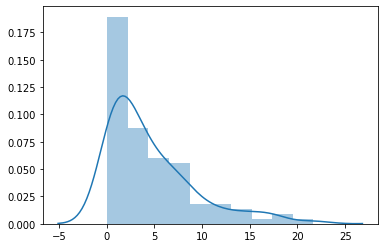

In [59]:
sns.distplot(exp)

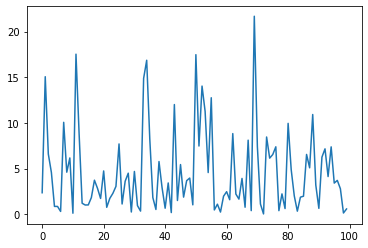

In [60]:
sns.lineplot(np.arange(100),exp)

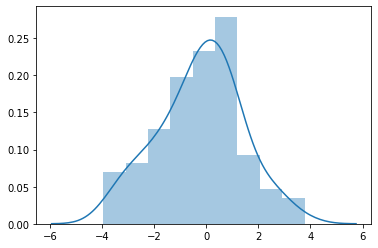

In [61]:
t_exp, d = compgp.phi.comp_phi(params, exp)
sns.distplot(t_exp)

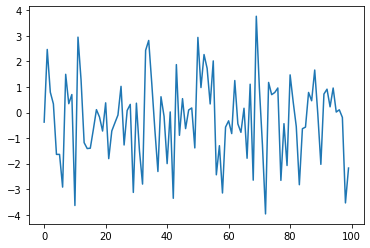

In [62]:
sns.lineplot(np.arange(100),t_exp)

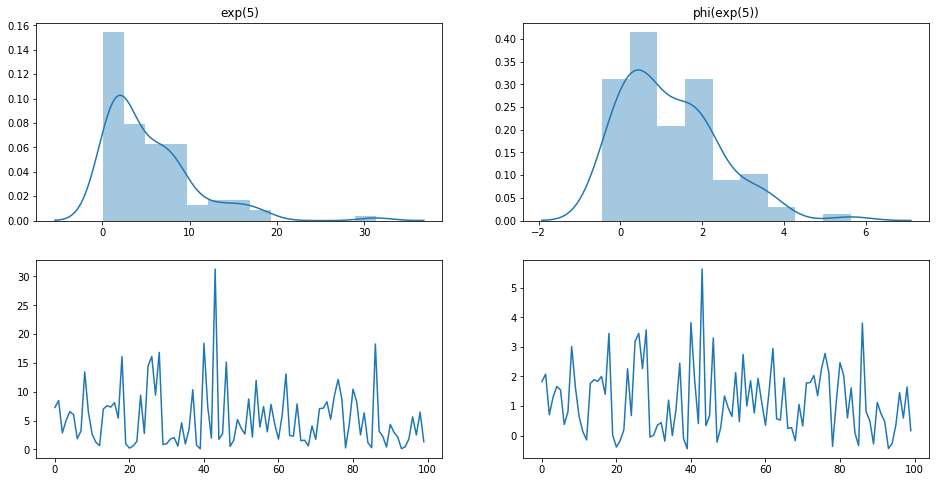

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))
sns.distplot(exp,ax=ax[0,0])
ax[0,0].set_title("exp(5)")
sns.distplot(t_exp,ax=ax[0,1])
ax[0,1].set_title("phi(exp(5))")
sns.lineplot(np.arange(100), exp,ax=ax[1,0])
sns.lineplot(np.arange(100), t_exp,ax=ax[1,1])

In [36]:
def estimator(**kwargs):
    x, exp = kwargs["x_train"], kwargs["y_train"]
    print(kwargs["hyperparams"])
    t_exp = exp
    model_holder = kwargs["model_holder"]
    for model in model_holder:
        t_exp, d = model.phi.comp_phi(model.phi.res.x, t_exp)
    
    fig, ax = plt.subplots(2, 2, figsize=(16,8))
    sns.distplot(exp,ax=ax[0,0])
    ax[0,0].set_title("exp(5)")
    sns.distplot(t_exp,ax=ax[0,1])
    ax[0,1].set_title("Transformation of Exp(5)")
    sns.lineplot(np.arange(100), exp,ax=ax[1,0])
    sns.lineplot(np.arange(100), t_exp,ax=ax[1,1])
    plt.show()
    
    return model_holder

  0%|          | 0/16 [00:00<?, ?it/s]

[('sa', 1), ('box_cox', 1)]
(('sa', 1), ('sa', 1), ('sa', 1), ('sa', 1))


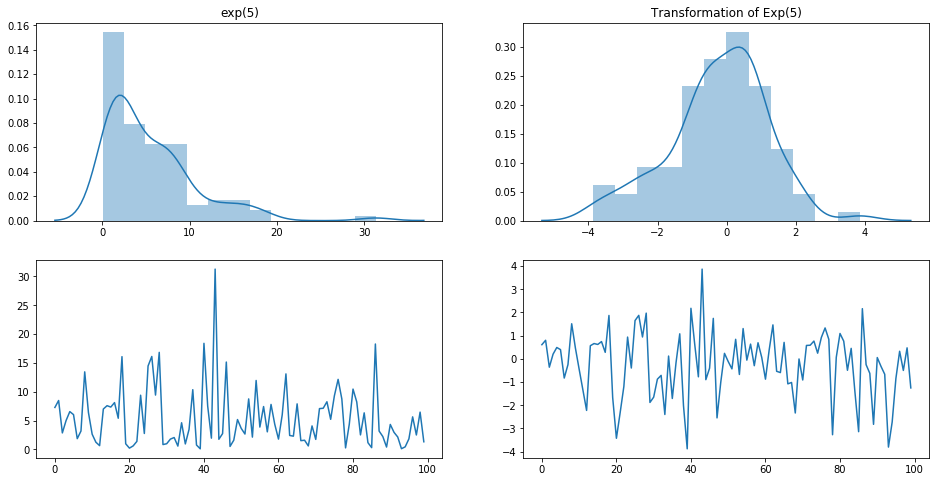

  6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

(('sa', 1), ('sa', 1), ('sa', 1), ('box_cox', 1))


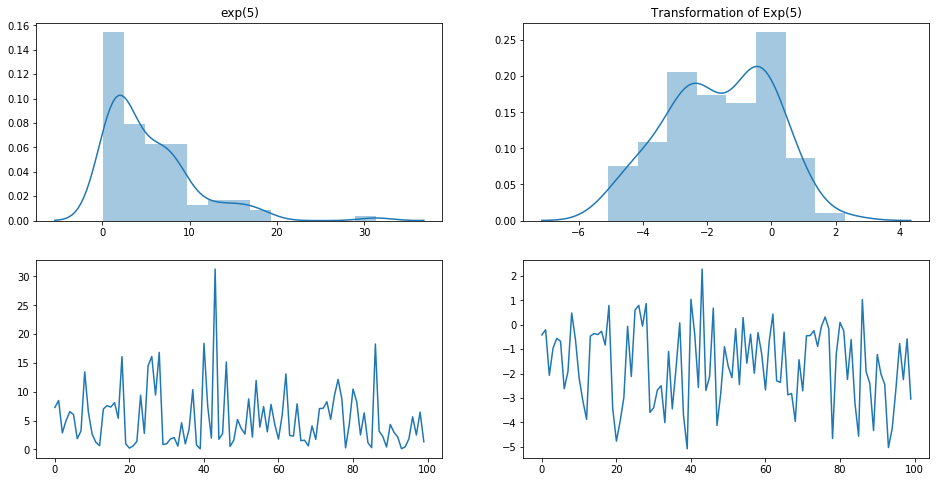

 12%|█▎        | 2/16 [00:01<00:13,  1.00it/s]

(('sa', 1), ('sa', 1), ('box_cox', 1), ('sa', 1))


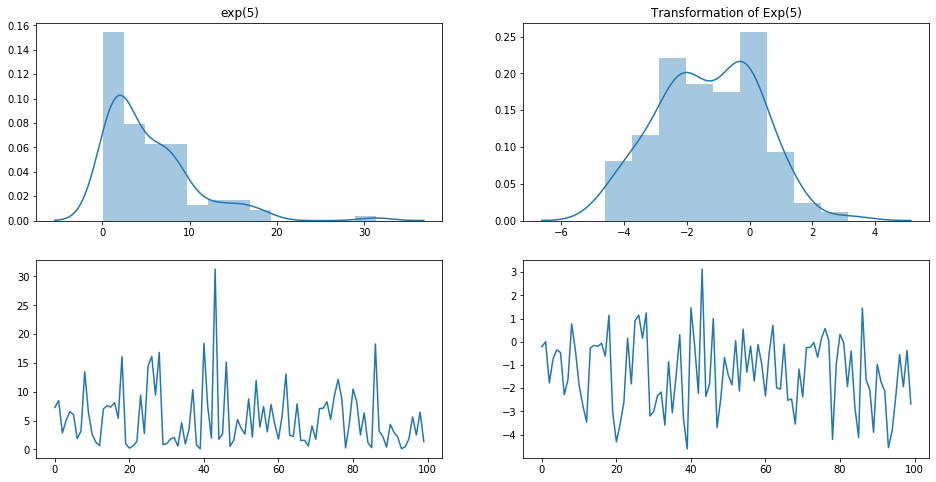

 19%|█▉        | 3/16 [00:02<00:12,  1.07it/s]

(('sa', 1), ('sa', 1), ('box_cox', 1), ('box_cox', 1))


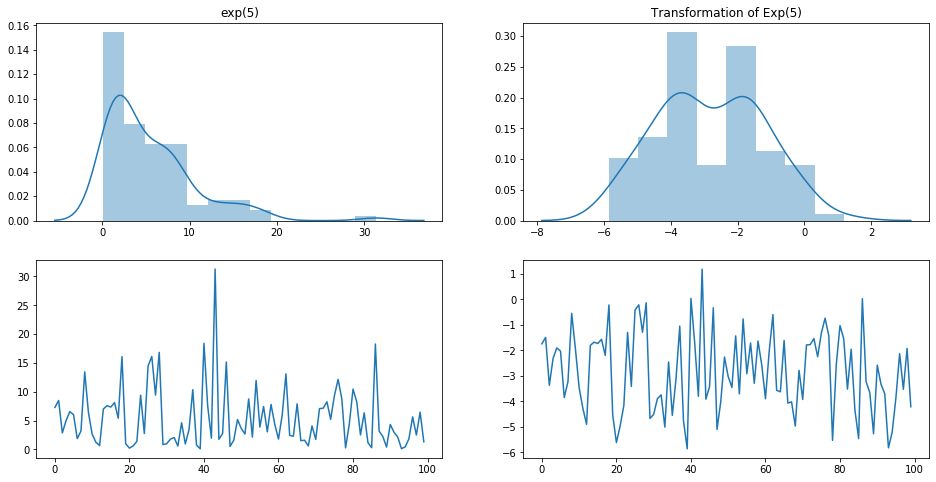

 25%|██▌       | 4/16 [00:03<00:10,  1.10it/s]

(('sa', 1), ('box_cox', 1), ('sa', 1), ('sa', 1))


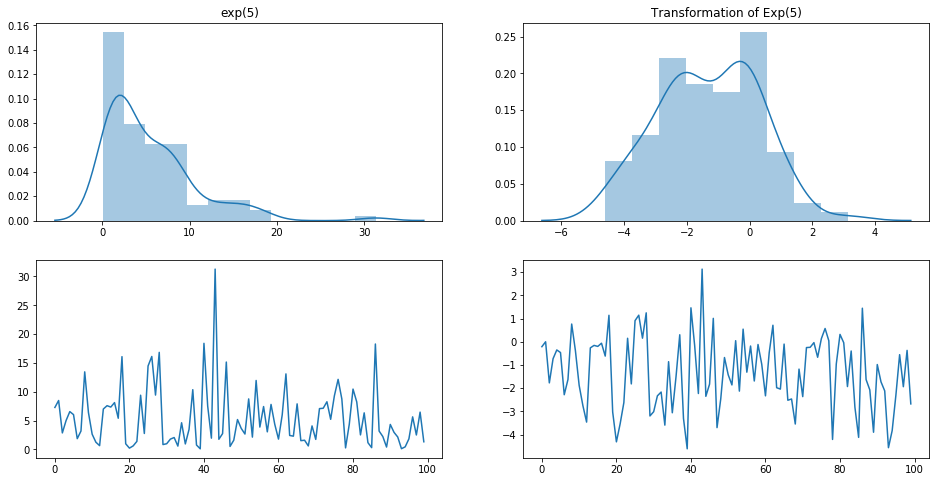

 31%|███▏      | 5/16 [00:04<00:09,  1.16it/s]

(('sa', 1), ('box_cox', 1), ('sa', 1), ('box_cox', 1))


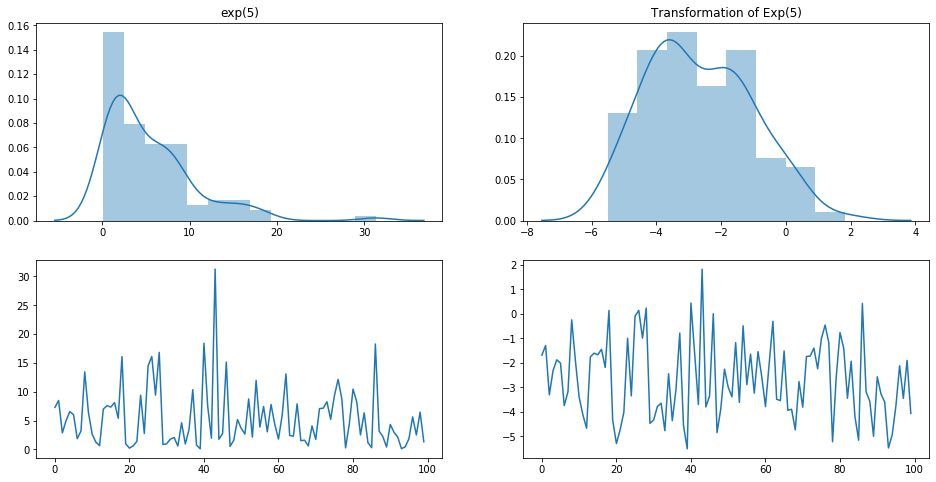

 38%|███▊      | 6/16 [00:05<00:09,  1.10it/s]

(('sa', 1), ('box_cox', 1), ('box_cox', 1), ('sa', 1))


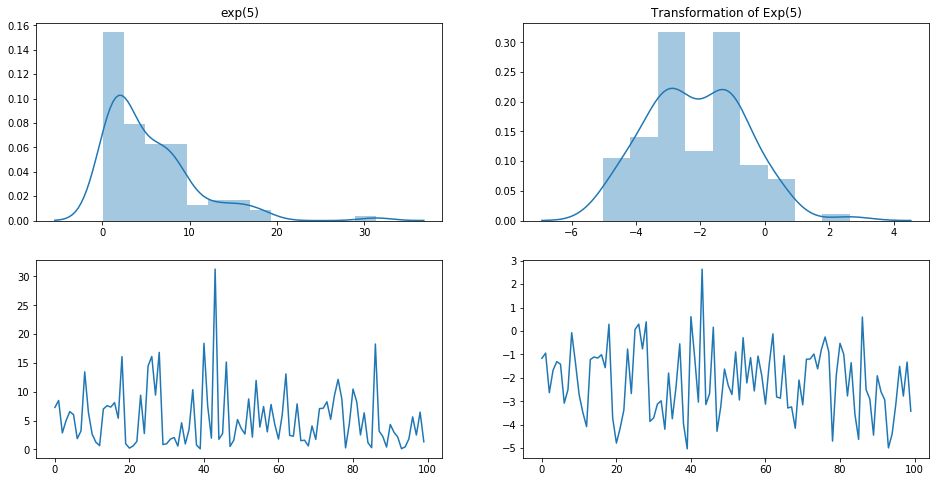

 44%|████▍     | 7/16 [00:06<00:07,  1.16it/s]

(('sa', 1), ('box_cox', 1), ('box_cox', 1), ('box_cox', 1))


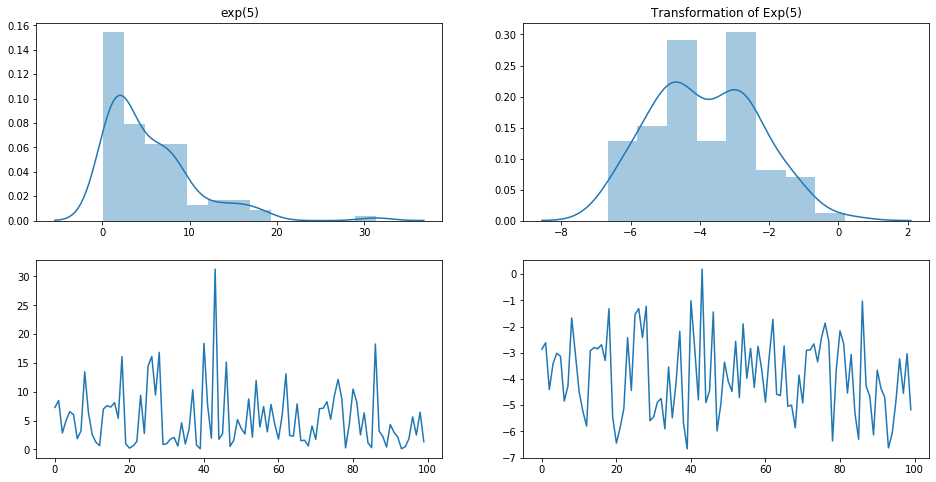

 50%|█████     | 8/16 [00:07<00:06,  1.17it/s]

(('box_cox', 1), ('sa', 1), ('sa', 1), ('sa', 1))


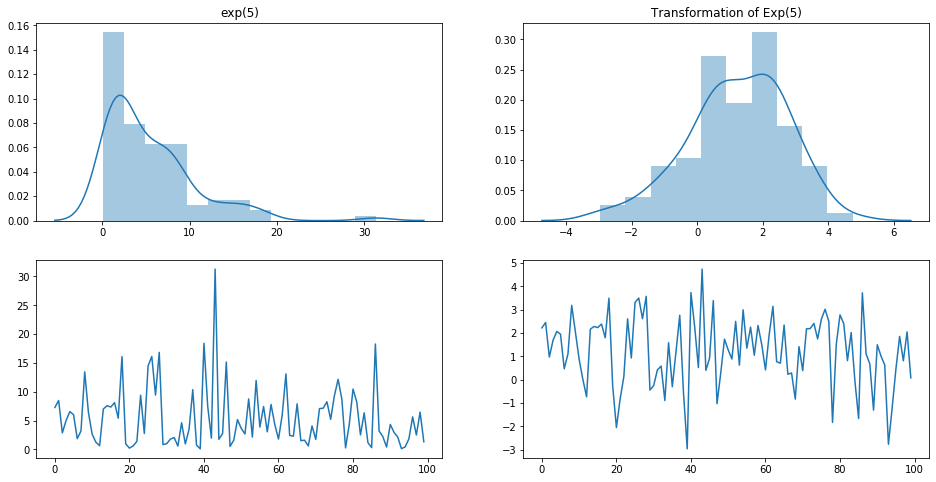

 56%|█████▋    | 9/16 [00:08<00:06,  1.13it/s]

(('box_cox', 1), ('sa', 1), ('sa', 1), ('box_cox', 1))


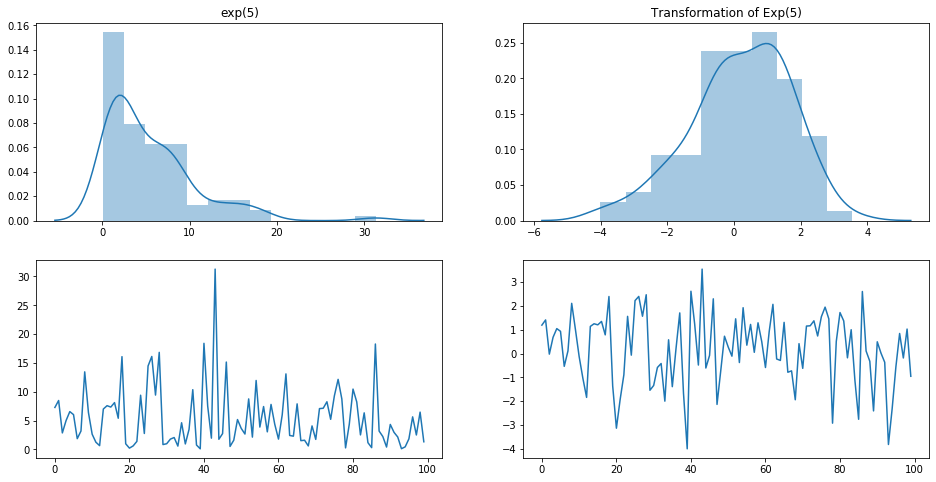

 62%|██████▎   | 10/16 [00:08<00:05,  1.19it/s]

(('box_cox', 1), ('sa', 1), ('box_cox', 1), ('sa', 1))


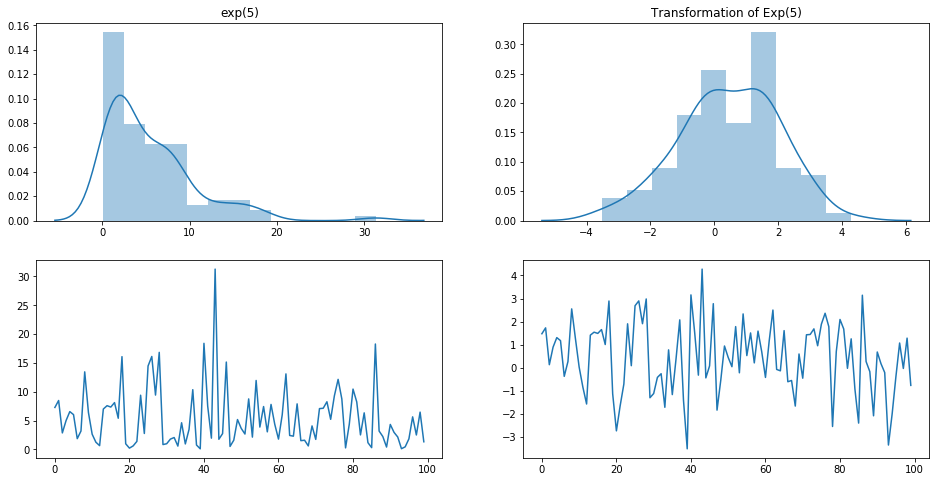

 69%|██████▉   | 11/16 [00:09<00:04,  1.24it/s]

(('box_cox', 1), ('sa', 1), ('box_cox', 1), ('box_cox', 1))


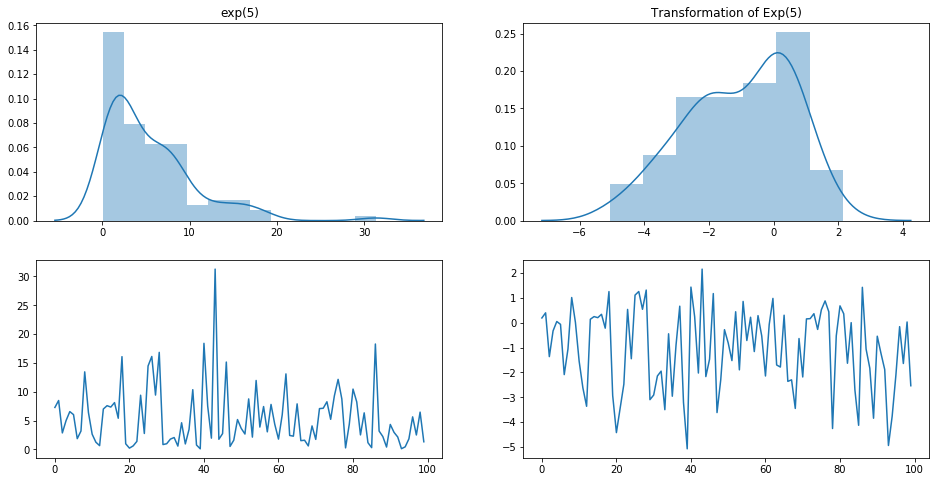

 75%|███████▌  | 12/16 [00:10<00:03,  1.28it/s]

(('box_cox', 1), ('box_cox', 1), ('sa', 1), ('sa', 1))


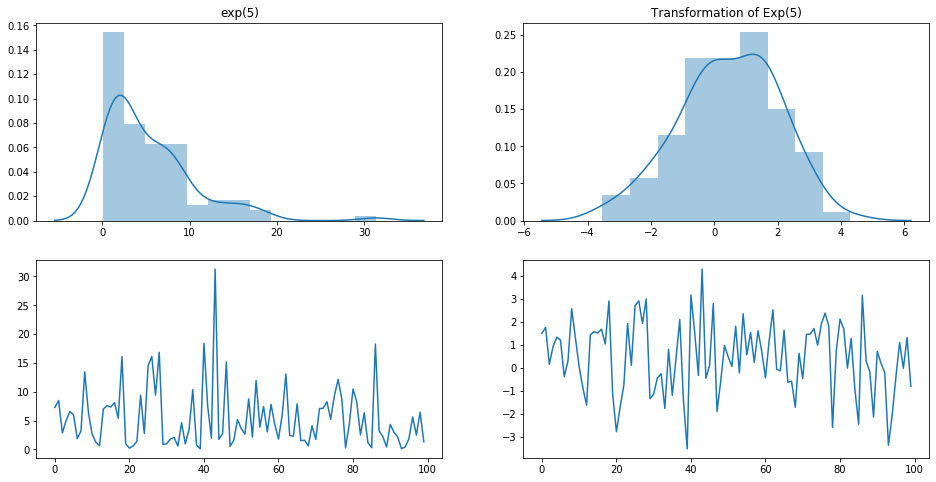

 81%|████████▏ | 13/16 [00:10<00:02,  1.30it/s]

(('box_cox', 1), ('box_cox', 1), ('sa', 1), ('box_cox', 1))


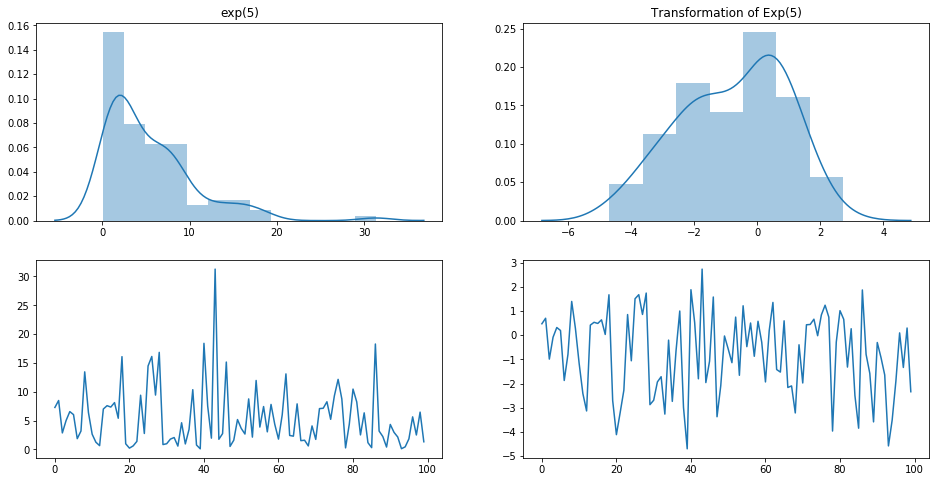

 88%|████████▊ | 14/16 [00:11<00:01,  1.31it/s]

(('box_cox', 1), ('box_cox', 1), ('box_cox', 1), ('sa', 1))


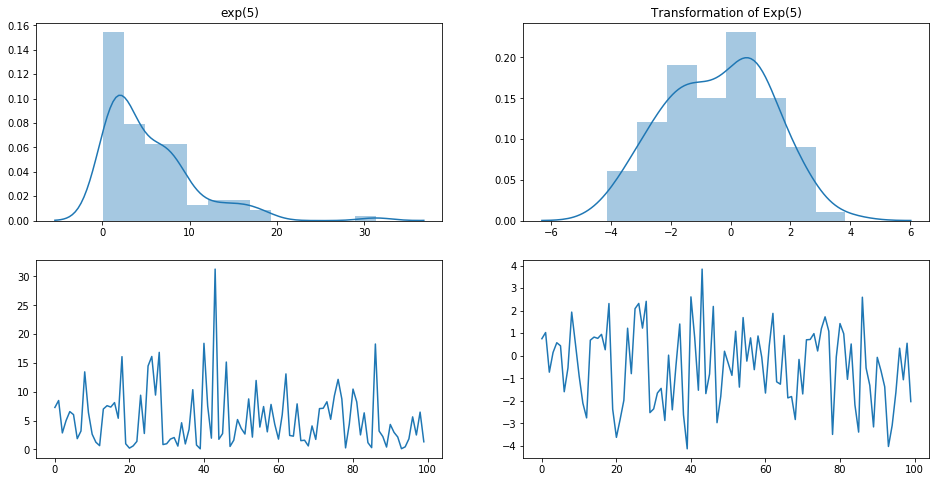

 94%|█████████▍| 15/16 [00:12<00:00,  1.34it/s]

(('box_cox', 1), ('box_cox', 1), ('box_cox', 1), ('box_cox', 1))


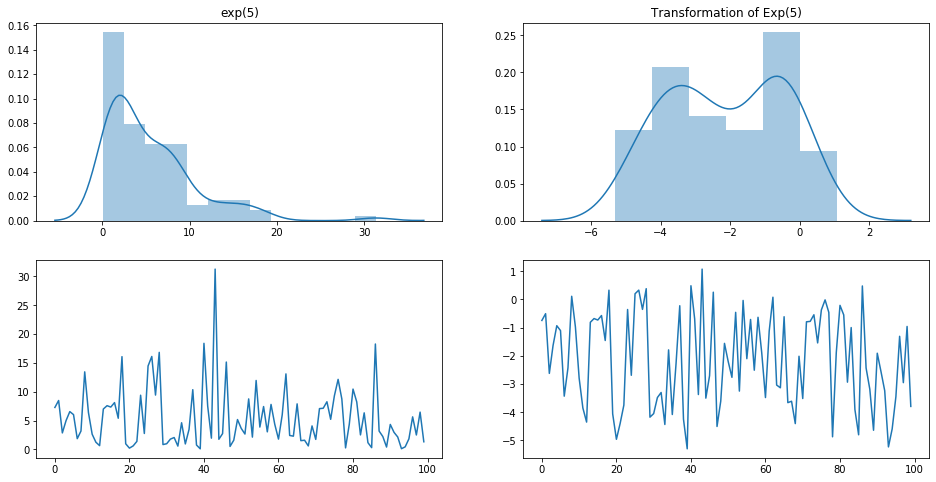

100%|██████████| 16/16 [00:13<00:00,  1.22it/s]


In [52]:
result = grid_search(estimator, np.arange(100), exp, {"c":4,"n":[1],"transformations":["sa","box_cox"]})

In [43]:
model = result[0]["result"][1]

In [51]:
model.phi.res.x

array([9.99999560e-01, 5.25688894e-07])

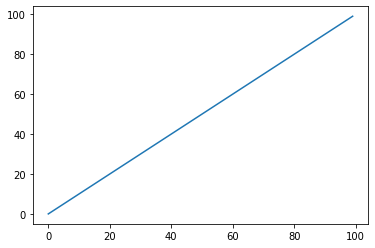

In [50]:
sns.lineplot(np.arange(100), model.phi.comp_phi(model.phi.res.x, np.arange(100))[0])